In [1]:
import PollingSystem as PS
import MarkovianRP as MRP
import StaticRP as SRP
import numpy as np

from matplotlib import pyplot as plt
from importlib import reload 

/home/win/.local/lib/python3.8/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/home/win/.local/lib/python3.8/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
/home/win/.local/lib/python3.8/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


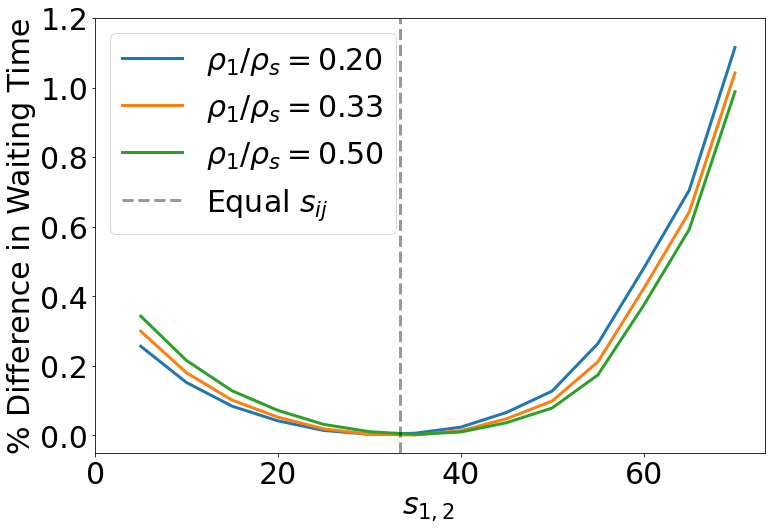

In [98]:
#vary along single axis, different lambda, same switching times
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size":30})
reload(PS)
beta = 1/16
base = beta*0.3
els = base*np.ones(3)
#els = np.array([0.3, 0.1, 0.1])/beta
ps = PS.PollingSystem(els, beta)
sys_traffic = 0.5

percents = np.array([0.2, 1/3, 1/2])
ns = len(percents)
s_total = 100
spercents = np.arange(0.05, 0.75, 0.05)
    
scales = np.arange(0.05, 2.05, 0.05)
base = 40

plt.figure(figsize=(12,8))
for percent in percents:
    p_other = (1-percent)/2
    ps.Ls = np.array([percent, p_other, p_other])*sys_traffic/beta#normalize system traffic
    S = np.array([[ 0, 40, 40],
                   [40, 0, 40],
                   [40, 40, 0]])
    opt_ws = []
    sqrt_ws = []
    for sp in spercents:
#         S[0,2] = base*scale
#         S[0,1] = S[0,2]
#         S[1,0] = S[0,2]
#         S[2,0] = S[0,2]
        S[0,1] = sp*s_total
        S[1,0] = S[0,1]
        
        S[0,2] = s_total*(1-sp)/2
        S[2,0] = S[0,2]
        S[1,2] = S[0,2]
        S[2,1] = S[0,2]
        
        
        #check to see if the square root rule holds
        
        argmin, valmin = ps.calc_optimal_rp(S)
        #print(argmin, valmin)
        opt_ws.append(valmin)
        pi = ps._opt_pi_equal_distances()
        rp = MRP.RandomRP(pi)
        wait = ps.calc_avg_wait(S,rp)
        #print(pi, wait)
        sqrt_ws.append(wait)
    plt.plot(spercents*s_total, (np.array(sqrt_ws)- np.array(opt_ws))/np.array(opt_ws),
             linewidth=3, label="$\\rho_1/\\rho_s=%.2f$"%(percent))
    
#     plt.plot(spercents, opt_ws, label="optimal")
#     plt.plot(spercents, sqrt_ws, label="sqrt")
# plt.legend()
# plt.show()

plt.plot([s_total/3,s_total/3],[-0.05,1.2], "--k", linewidth=3, alpha=0.4, label="Equal $s_{ij}$")
plt.ylim(-0.05, 1.2)
plt.xticks([0, 20, 40, 60])
plt.xlabel("$s_{1,2}$ ")
plt.ylabel("% Difference in Waiting Time")
plt.legend()
# plt.show()
plt.savefig('fig_square_root_rule.png', format='png', bbox_inches='tight')
# plt.plot(percents, (np.array(sqrt_ws)- np.array(opt_ws))/np.array(opt_ws) , label="% Diff")
# plt.legend()
# plt.show()

In [22]:
#vary along two axes, different lambda, same switching times
reload(PS)
beta = 1/16

ps = PS.PollingSystem(els, beta)
sys_traffic = 0.5
S = np.array([[ 0, 10, 10],
               [10, 0, 10],
               [10, 10, 0]])
S = S*4
#check to see if the square root rule holds
opt_ws = []
sqrt_ws = []
percents = np.arange(0.05, 1, 0.05)
print(percents)
ns = len(percents)
opt_ws = np.zeros((ns, ns))
sqrt_ws = np.zeros((ns, ns))

for i in range(ns):
    for j in range(ns):
        if (percents[i] + percents[j]) < 1:
            p3 = 1 - percents[i] - percents[j]
            ps.Ls = np.array([percents[i], percents[j], p3])*sys_traffic/beta
            argmin, valmin = ps.calc_optimal_rp(S)
            opt_ws[i,j] = valmin

            pi = ps._opt_pi_equal_distances()
            rp = MRP.RandomRP(pi)
            wait = ps.calc_avg_wait(S,rp)
            sqrt_ws[i,j] = wait


[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95]


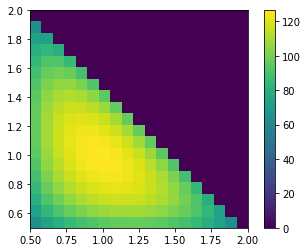

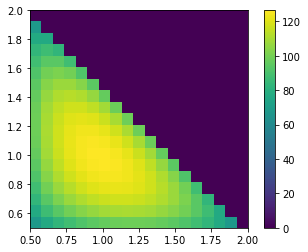

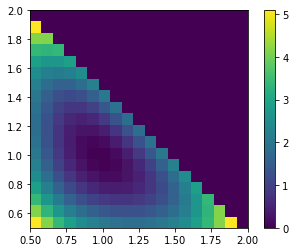

/tmp/ipykernel_70781/1766159841.py:13: RuntimeWarning: invalid value encountered in true_divide
  ws = plt.imshow((sqrt_ws-opt_ws)/opt_ws, extent=[0.5,2,0.5,2], origin='lower')


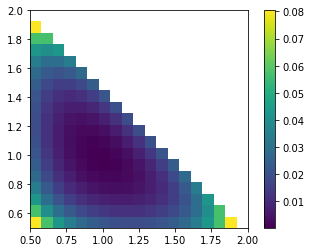

/tmp/ipykernel_70781/1766159841.py:18: RuntimeWarning: invalid value encountered in true_divide
  percent_diffs = (sqrt_ws-opt_ws)/opt_ws


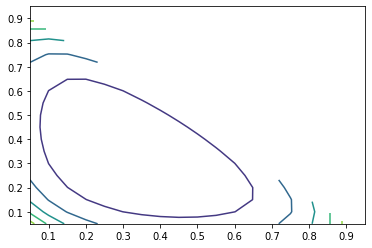

In [27]:
ws = plt.imshow(opt_ws, extent=[0.5,2,0.5,2], origin='lower')
plt.colorbar(ws)
plt.show()

ws = plt.imshow(sqrt_ws, extent=[0.5,2,0.5,2], origin='lower')
plt.colorbar(ws)
plt.show()

ws = plt.imshow(sqrt_ws-opt_ws, extent=[0.5,2,0.5,2], origin='lower')
plt.colorbar(ws)
plt.show()

ws = plt.imshow((sqrt_ws-opt_ws)/opt_ws, extent=[0.5,2,0.5,2], origin='lower')
plt.colorbar(ws)
plt.show()

#let's try contours
percent_diffs = (sqrt_ws-opt_ws)/opt_ws
plt.contour(percents, percents, percent_diffs)



In [74]:
#vary along two axes, different lambda, different (but still symmetric) switching times
reload(PS)
beta = 1/16
base = beta*0.2
els = base*np.ones(3)
#els = np.array([0.3, 0.1, 0.1])/beta
ps = PS.PollingSystem(els, beta)
sys_traffic = 0.9
S = np.array([[ 0, 5, 10],
               [5, 0, 15],
               [10, 15, 0]])
S = S*1
#check to see if the square root rule holds
opt_ws = []
sqrt_ws = []
scales = np.array([0.5, 0.6, 0.7, 0.8,0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2])
ns = len(scales)
opt_ws = np.zeros((ns, ns))
sqrt_ws = np.zeros((ns, ns))

for i in range(ns):
    for j in range(ns):
        ps.Ls = base*np.ones(3)
        ps.Ls[0] = base*scales[i]
        ps.Ls[1] = base*scales[j]
        ps.Ls = (ps.Ls/np.sum(ps.Ls))*sys_traffic/beta#normalize system traffic
        argmin, valmin = ps.calc_optimal_rp(S)
        opt_ws[i,j] = valmin
        
        pi = ps._opt_pi_equal_distances()
        rp = MRP.RandomRP(pi)
        wait = ps.calc_avg_wait(S,rp)
        sqrt_ws[i,j] = wait


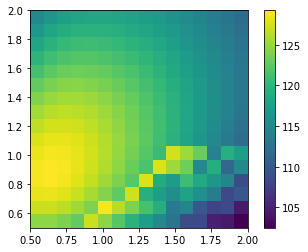

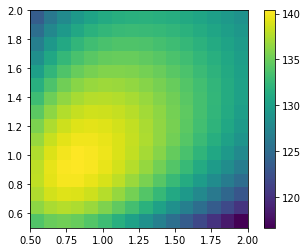

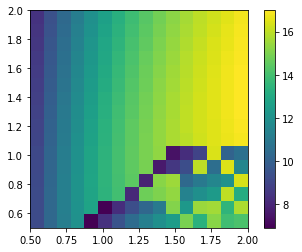

In [75]:
ext = [0.5,2,0.5,2]
ws = plt.imshow(opt_ws.T, extent=ext, origin='lower')
plt.colorbar(ws)
plt.show()

ws = plt.imshow(sqrt_ws.T, extent=ext, origin='lower')
plt.colorbar(ws)
plt.show()

ws = plt.imshow((sqrt_ws-opt_ws).T, extent=ext, origin='lower')
plt.colorbar(ws)
plt.show()
